## Project 2 : Ames Housing Data and Kaggle Challenge
### 03. Model Benchmarks

**Import the libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

%matplotlib inline

In [2]:
%store -r Xtrain
%store -r ytest
%store -r log_saleprice
%store -r ytrain

In [3]:
#check the datasets
Xtrain.shape

(2051, 112)

In [4]:
ytrain.shape

(2051,)

In [5]:
ytest.isnull().sum().sum()

0

**Create features**

In [6]:
#Create the X and y features
X  = Xtrain
y =  ytrain

**train_test_split**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42 )

**Standard scaler**

In [8]:
#scale the entire dataset 
sc = StandardScaler() #instatiating

scaled_Xtrain = sc.fit_transform(X_train)

In [9]:
#transform the test dataset for the train dataset
scaled_Xtest = sc.transform(X_test)

In [10]:
print(f'X_train shape is: {X_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'X_test shape is: {X_test.shape}')
print(f'y_test shape is: {y_test.shape}')

X_train shape is: (1538, 112)
y_train shape is: (1538,)
X_test shape is: (513, 112)
y_test shape is: (513,)


**Cross_validation**

In [11]:
lm = LinearRegression()  #Instatiate the model

In [12]:
lm.fit(X_train, y_train)#fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
pd.Series(lm.coef_, index = X_train.columns)

ms_subclass           -155.837044
lot_area                 0.718114
overall_qual       -566689.327064
overall_cond          8490.362526
year_built             254.174037
                        ...      
condition_2_PosA     21424.645162
condition_2_PosN     31705.262210
condition_2_RRAe         0.000000
condition_2_RRAn      6463.797230
condition_2_RRNn      3618.369397
Length: 112, dtype: float64

**Model Evaluation**

In [14]:
#train score
lm.score(X_train, y_train)

0.8912206204057035

In [15]:
# test score
lm.score(X_test, y_test)

0.7147417890340237

In [16]:
cross_val_score(lm, X_train, y_train, cv = 5).mean()

0.6361556344060171

In [17]:
y_predict = lm.predict(scaled_Xtest) #predicted y

In [18]:
residuals = y_test - y_predict

In [19]:
rmse = np.sqrt((residuals**2).mean())
rmse

2894962.2226707246

(array([  6.,   8.,  41., 135., 125., 115.,  62.,  16.,   4.,   1.]),
 array([-4629457.02840492, -4232246.22544886, -3835035.4224928 ,
        -3437824.61953674, -3040613.81658068, -2643403.01362462,
        -2246192.21066856, -1848981.4077125 , -1451770.60475644,
        -1054559.80180038,  -657348.99884432]),
 <a list of 10 Patch objects>)

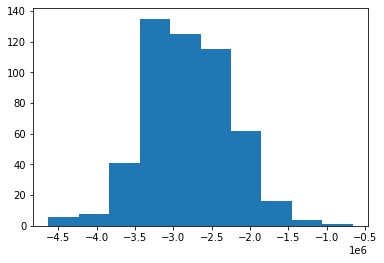

In [20]:
plt.hist(residuals)

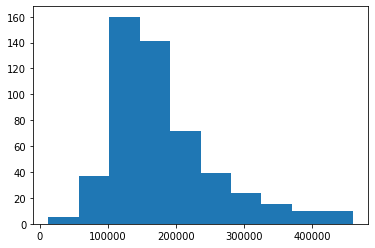

In [21]:
plt.hist(y_test);

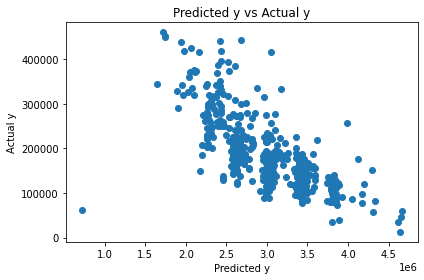

In [22]:
#plot the predicted price against actual price
plt.plot()
plt.scatter(y_predict, y_test)
plt.title('Predicted y vs Actual y')
plt.xlabel('Predicted y')
plt.ylabel('Actual y')

plt.tight_layout();

**LASSO Regression**

In [23]:
from sklearn.linear_model import Lasso, LassoCV

In [24]:
lasso_CV = LassoCV(cv =5) #instatiate the model

In [25]:
cross_val_score(lasso_CV, scaled_Xtrain, y_train, cv = 5).mean()

/Users/kalz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1230959713.878662, tolerance: 649763303.8809253
  tol, rng, random, positive)
/Users/kalz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1845672780.6882324, tolerance: 649763303.8809253
  tol, rng, random, positive)
/Users/kalz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2186736569.7923584, tolerance: 649763303.8809253
  tol, rng, random, positive)
/Users/kalz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: Convergenc

0.8282061335321563

In [26]:
# Fit model
lasso_CV.fit(scaled_Xtrain, y_train)

/Users/kalz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1040361333.9088135, tolerance: 816865125.5190992
  tol, rng, random, positive)
/Users/kalz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2100261466.6984863, tolerance: 816865125.5190992
  tol, rng, random, positive)
/Users/kalz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2811974893.5009766, tolerance: 816865125.5190992
  tol, rng, random, positive)
/Users/kalz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: Convergen

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [27]:
print(lasso_CV.score(scaled_Xtrain, y_train)) #Lasso r2 for train
print(lasso_CV.score(scaled_Xtest, y_test))  #lasso r2 for test

0.8832047813818398
0.7279605481638673


In [28]:
 lasso_coef = lasso_CV.coef_

**saleprice prediction**

In [29]:
y_pred = lasso_CV.predict(scaled_Xtest)

In [30]:
residual = y_test - y_pred

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,  29., 465.,  18.]),
 array([-716781.63692272, -631852.63072556, -546923.6245284 ,
        -461994.61833124, -377065.61213408, -292136.60593692,
        -207207.59973976, -122278.5935426 ,  -37349.58734544,
          47579.41885172,  132508.42504888]),
 <a list of 10 Patch objects>)

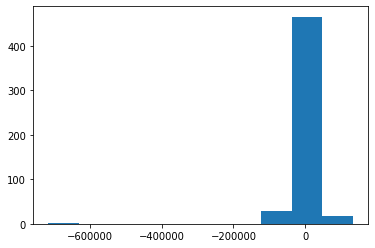

In [31]:
plt.hist(residual)

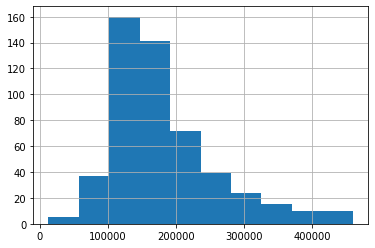

In [32]:
y_test.hist()

In [33]:
rmse = np.sqrt((residual**2).mean())
rmse

40869.658206230226

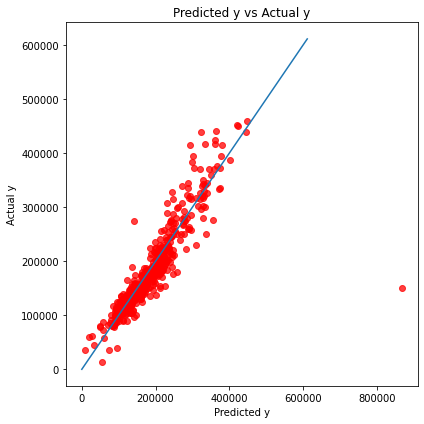

In [34]:
#plot the predicted price against actual price
plt.figure(figsize = (6,6))

plt.scatter(y_pred, y_test, alpha = 0.75, color = 'r')

plt.title('Predicted y vs Actual y')
plt.xlabel('Predicted y')
plt.ylabel('Actual y')

plt.plot([0, np.max(y)], [0, np.max(y)])

plt.tight_layout();

**Choosing a better model**

In [35]:
Lm_R2    = lm.score(X_test, y_test)
lasso_R2 = lasso_CV.score(scaled_Xtest, y_test)


models = pd.DataFrame({'linear Regression': [Lm_R2], 
              'Lasso Regression' : [lasso_R2]})

models.T

,0
linear Regression,0.714742
Lasso Regression,0.727961


In [36]:
%store lasso_coef
%store lasso_R2
%store  Xtrain
%store  ytest
%store  log_saleprice
%store  ytrain

Stored 'lasso_coef' (ndarray)
Stored 'lasso_R2' (float64)
Stored 'Xtrain' (DataFrame)
Stored 'ytest' (DataFrame)
Stored 'log_saleprice' (Series)
Stored 'ytrain' (Series)
